Question posée [ici](https://groups.google.com/forum/#!topic/sage-support/OU6OQJTSDTA)

In [1]:
var('Kb','b0','K1','Ks','a0')
fx(x)=-Kb*x^4 - (b0*Kb + K1*Kb + Ks)*x^3 - (b0*K1*Kb - a0*K1*Kb + K1*Ks - Kb*Ks)*x^2 +\
(a0*K1*Ks + K1*Kb*Ks + Ks^2)*x + K1*Ks^2

This polynom, being of the fourth degree, can be solved by radicals :

In [2]:
%%time
Sols=solve(fx(x)==0,x)

CPU times: user 4.75 s, sys: 68 ms, total: 4.82 s
Wall time: 4.83 s


These roots can be substituted into to get their numerical values. However, all these roots appear to be complex :

In [3]:
%%time
map(lambda s:s.rhs().subs(K1=10^-2.15,Ks=10^-14,Kb=10^5.0,a0=0.1,b0=0).n(prec=200), Sols)

CPU times: user 204 ms, sys: 0 ns, total: 204 ms
Wall time: 206 ms


[-0.030381402961229229953143970988094224594533443450927734375000 + 3.5269256985998310369746945444687459310638037791296706645328e-19*I,
 -1.0000290526224198117688501952216029167175292968750000000000e-13 + 1.9604333383778952044546653018964896337017699335828835663365e-18*I,
 2.1684043449710088680149056017398834228515625000000000000000e-18 - 1.8532803875203763331014842143882749965754697038115882470888e-18*I,
 0.023301945117487846831361153476791514549404382705688476562500 - 4.5984552071750216764364498067867453583047486617699423951111e-19*I]

We'll use the alternate ```roots()``` mathod to work on these roots :

In [4]:
%%time
fn(x)=fx(x).subs(K1=10^-2.15,Ks=10^-14,Kb=10^5.0,a0=0.1,b0=0)
Roots=fn(x).roots()

CPU times: user 9.51 s, sys: 12 ms, total: 9.52 s
Wall time: 9.53 s


(One notes that this method is a bit slower than the conventional Maxima solver).

Sage cannot prove directly that any of these roots is real (i. e. has a null imaginary part), and takes a looong time to fail :

In [5]:
%%time
map(lambda r:bool(r[0].imag_part()==0), Roots)
## bool(Roots[0][0].imag_part()==0)

CPU times: user 37min 8s, sys: 1.09 s, total: 37min 10s
Wall time: 37min 23s


[False, False, False, False]

So we'll soften a bit our definition : we'll define a complew whose argument as a very low absolute value :

In [6]:
def almost_real(x, prec=200, lim=1/100):
    xn=x.n(prec=prec)
    return abs(xn.imag_part()/xn.real_part())<lim

Using this definition, our four roots appear to be "almost real" :

In [7]:
%%time
map(lambda r:almost_real(r[0],prec=400, lim=1e-6), Roots)

CPU times: user 3.36 s, sys: 8 ms, total: 3.37 s
Wall time: 3.37 s


[True, True, True, True]

and the numerical values have exceedingly low imaginary parts :

In [8]:
map(lambda t:t[0].n(prec=200), Roots)

[-0.030381402961229245465871137638207016449632928362067578762791 + 4.0459057065637318448679590181820232757649190056571857554720e-65*I,
 -9.9999999998487309265248210283624295044441936005028016495344e-14 + 7.0803555820640070180739281963745767457811731109360175667190e-62*I,
 -9.9999999999999982811331537901498151789457625337193760611361e-20 - 7.0791263791519271641650697562871615940066053989841693195261e-62*I,
 0.023301945117487866609321120356080465806034937118913871251913 - 5.2751086186435857537263991055971750503326309575054329483084e-65*I]

Let's compute the (real part of the) numerical value ofthese roots :

In [9]:
%%time
nRoots=map(lambda t:t[0].n(prec=100).real_part(), Roots)
print nRoots

[-0.030381402961229245465871137639, -9.9999999998487309940274488735e-14, -9.9999999999437096350096904167e-20, 0.023301945117487866609321120357]
CPU times: user 3.52 s, sys: 20 ms, total: 3.54 s
Wall time: 3.61 s


and use them to plot thje polynom in an "interesting" range :

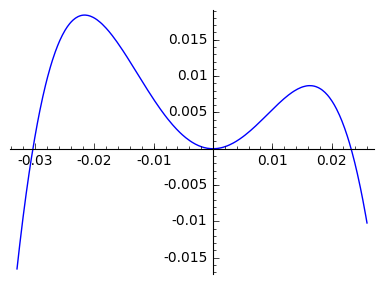

CPU times: user 728 ms, sys: 100 ms, total: 828 ms
Wall time: 744 ms


In [10]:
%%time
lb=min(nRoots)
ub=max(nRoots)
Int=ub-lb
plot(fn(x),(x,lb-0.05*Int,ub+0.05*Int)).show(figsize=4)

This allows us to prove that the polynom is negative for, e. g., x=-0,04, positive for x=-0.02, positive again for x=0.02 and negative for x=0.03. The polynom being continuous on $\mathbb{R}$, there exists at least one root between -0.04 and -0.02, and at least another one between 0.02 and 0.03.

This is consistent with the hint given by the numerical extraction of roots above.

Let's try to assess the approximale numerical value of the polynom aroundf these numerical roots :

In [11]:
%%time
map(lambda t:fn(t).n(prec=200), nRoots)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.84 ms


[-9.7144514654701197287067770957946777343750000000000000000000e-17,
 -9.3241050152309326480312952885174287219725666975253490640279e-40,
 3.9850833870136063537865001415768247786292985734019994798234e-42,
 -6.2450045135165055398829281330108642578125000000000000000000e-17]

All those values are indeed very close to 0, but cannot be proved to be 0.

Another hint is given by assessing the ratios of the magnitudes of the (numerical) imaginary and real parts of these roots :

In [12]:
%%time
map(lambda t:(t[0].imag_part()/t[0].real_part()).n(), Roots)

CPU times: user 2min 48s, sys: 120 ms, total: 2min 48s
Wall time: 2min 48s


[-9.78820810240222e-18,
 0.0000282607484419527,
 -0.0931588009145428,
 -8.15867393557916e-18]

The two "middle" roots have larger (numerical) imaginary components.

Let's compute the value of the polynom between the two "middle" roots :

In [13]:
mid=(nRoots[2]+nRoots[1])/2
fn(mid).n(prec=40)

-1.7698609212e-25

The polynom appears to be slightly negative at this point, whereas it is positive at x=-0.02 and x=0.02.

If this value can be trusted (at least in sign), this proves that the two "middle" numerical roots are real. But this supposes a (non-trivial) estimation of the incertitude  on the value of the polynom, for which Sage does not offer readily available tools.

In short, the polynom appears to have at least one real root demonstrably between x=0.02 and x=0.03, whose numerical approximation is about x=0.02330..., and whose exact value is (in Sage notation, the classical notation cannot be usefully printed on anything narrower than a king-size bed sheet...) :

In [14]:
Roots[3][0]

1/143763428279844864000000*sqrt(1/104911111732827560680076042342)*sqrt((542073702935533178629757776564649628002991279276058314861969408000000000000*(1/7570109681402991586529898929579673919111572231047041712469415368117630976844137326959438699683915968092204507567938653388800000000000000000*I*sqrt(79159417272701723166954811394651380303240909513234183715826839827423720089548228995010318133875334533392122323571471345878336572113175510104357792416477516765364197229091)*sqrt(48523969237822324559410064653914232742154872807119791869339231154) - 858055984299252079262598450804223011930245654278054962077160558234379325816613146866945555393/65294919182833817785320281727050180131730238530962196092687729591038427666080260004249600000000000000000)^(2/3) + 262631205705996576451722167277774865266563524960909295593652042839621632*(1/7570109681402991586529898929579673919111572231047041712469415368117630976844137326959438699683915968092204507567938653388800000000000000000*I*sqrt(7915941727270172316695481